In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [2]:
print(
    "scp cbsu:/home2/ayh8/clipnet_k562/data/mpra/k562_allelic_mpra_snps.csv.gz ~/github/scratch"
)

scp cbsu:/home2/ayh8/clipnet_k562/data/mpra/k562_allelic_mpra_snps.csv.gz ~/github/scratch


In [3]:
data = pd.read_csv("~/github/scratch/k562_allelic_mpra_snps.csv.gz")

<Axes: xlabel='ref_clipnet_ensemble', ylabel='alt_clipnet_ensemble'>

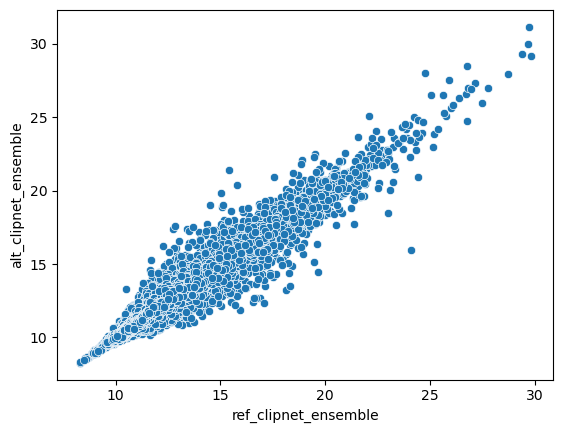

In [15]:
sns.scatterplot(
    x=data[data.active_K562 == 0]["ref_clipnet_ensemble"],
    y=data[data.active_K562 == 0]["alt_clipnet_ensemble"]
)

<Axes: xlabel='ref_clipnet_ensemble', ylabel='alt_clipnet_ensemble'>

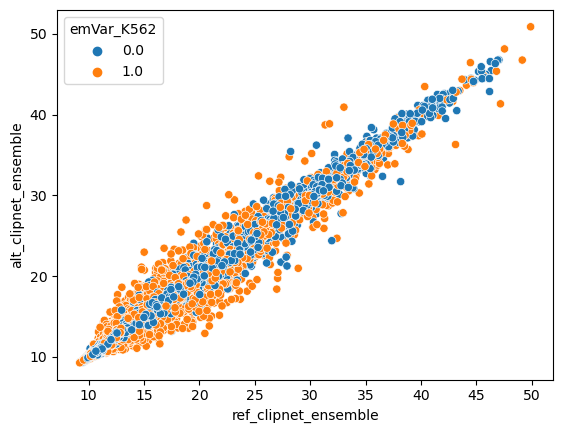

In [19]:
sns.scatterplot(
    x=data[data.active_K562 == 1]["ref_clipnet_ensemble"],
    y=data[data.active_K562 == 1]["alt_clipnet_ensemble"],
    hue=data[data.active_K562 == 1]["emVar_K562"]
)

<Axes: xlabel='active_K562'>

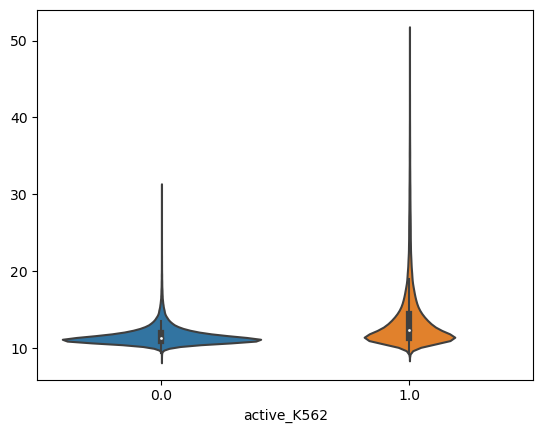

In [48]:
sns.violinplot(
    x=data["active_K562"],
    y=np.max(data[["ref_clipnet_ensemble", "alt_clipnet_ensemble"]], axis=1),
)

In [33]:
allele_max = pd.DataFrame(
    [data["active_K562"], np.max(data[["ref_clipnet_ensemble", "alt_clipnet_ensemble"]], axis=1)]
).T

In [35]:
from scipy.stats import mannwhitneyu, ttest_ind

In [42]:
ttest_ind(allele_max[allele_max.active_K562 == 0].iloc[:, 1], allele_max[allele_max.active_K562 == 1].iloc[:, 1])

TtestResult(statistic=-207.1793213514006, pvalue=0.0, df=280093.0)

In [43]:
mannwhitneyu(allele_max[allele_max.active_K562 == 0].iloc[:, 1], allele_max[allele_max.active_K562 == 1].iloc[:, 1])

MannwhitneyuResult(statistic=3631761523.0, pvalue=0.0)